# Exercise 2 The Lotka-Volterra System

The Lotka-Volterra system equations are:
$$ \frac{dx}{dt} = ax - bxy $$
$$ \frac{dy}{dt} = cxy - ey $$
To find the fixed points, we set $\frac{dx}{dt} = 0$ and $\frac{dy}{dt} = 0$ and solve for $x$ and $y$.

It has two fixed points:

1. $ (0, 0) $ 

This represents the extinction scenario where both prey and predator populations are zero.

2. $ \left(\frac{e}{c}, \frac{a}{b}\right) $ 

This represents a non-trivial equilibrium where both species coexist. The prey population stabilizes at $ \frac{e}{c} $ and the predator population stabilizes at $ \frac{a}{b} $.

To determine the stability, we need to compute the Jacobian matrix at each fixed point and analyze its eigenvalues.

1. At the fixed point $ (0, 0) $:
   - The Jacobian matrix is:
     $$
     \begin{bmatrix}
     a & 0 \\
     0 & -e
     \end{bmatrix}
     $$
   - The eigenvalues are $ a $ and $ -e $.
   - Since $ a > 0 $ and $ e > 0 $, one eigenvalue is positive and the other is negative, indicating a saddle point, which is unstable.

2. At the non-trivial fixed point $ \left(\frac{e}{c}, \frac{a}{b}\right) $:
   - The Jacobian matrix is:
     $$
     \begin{bmatrix}
     0 & -\frac{b e}{c} \\
     \frac{a c}{b} & 0
     \end{bmatrix}
     $$
   - The eigenvalues are $ \pm i \sqrt{ae} $, which are purely imaginary.
   - Purely imaginary eigenvalues suggest a center-like behavior, typically indicating neutrally stable cycles (neither converging nor diverging), characteristic of the Lotka-Volterra system's oscillatory dynamics.

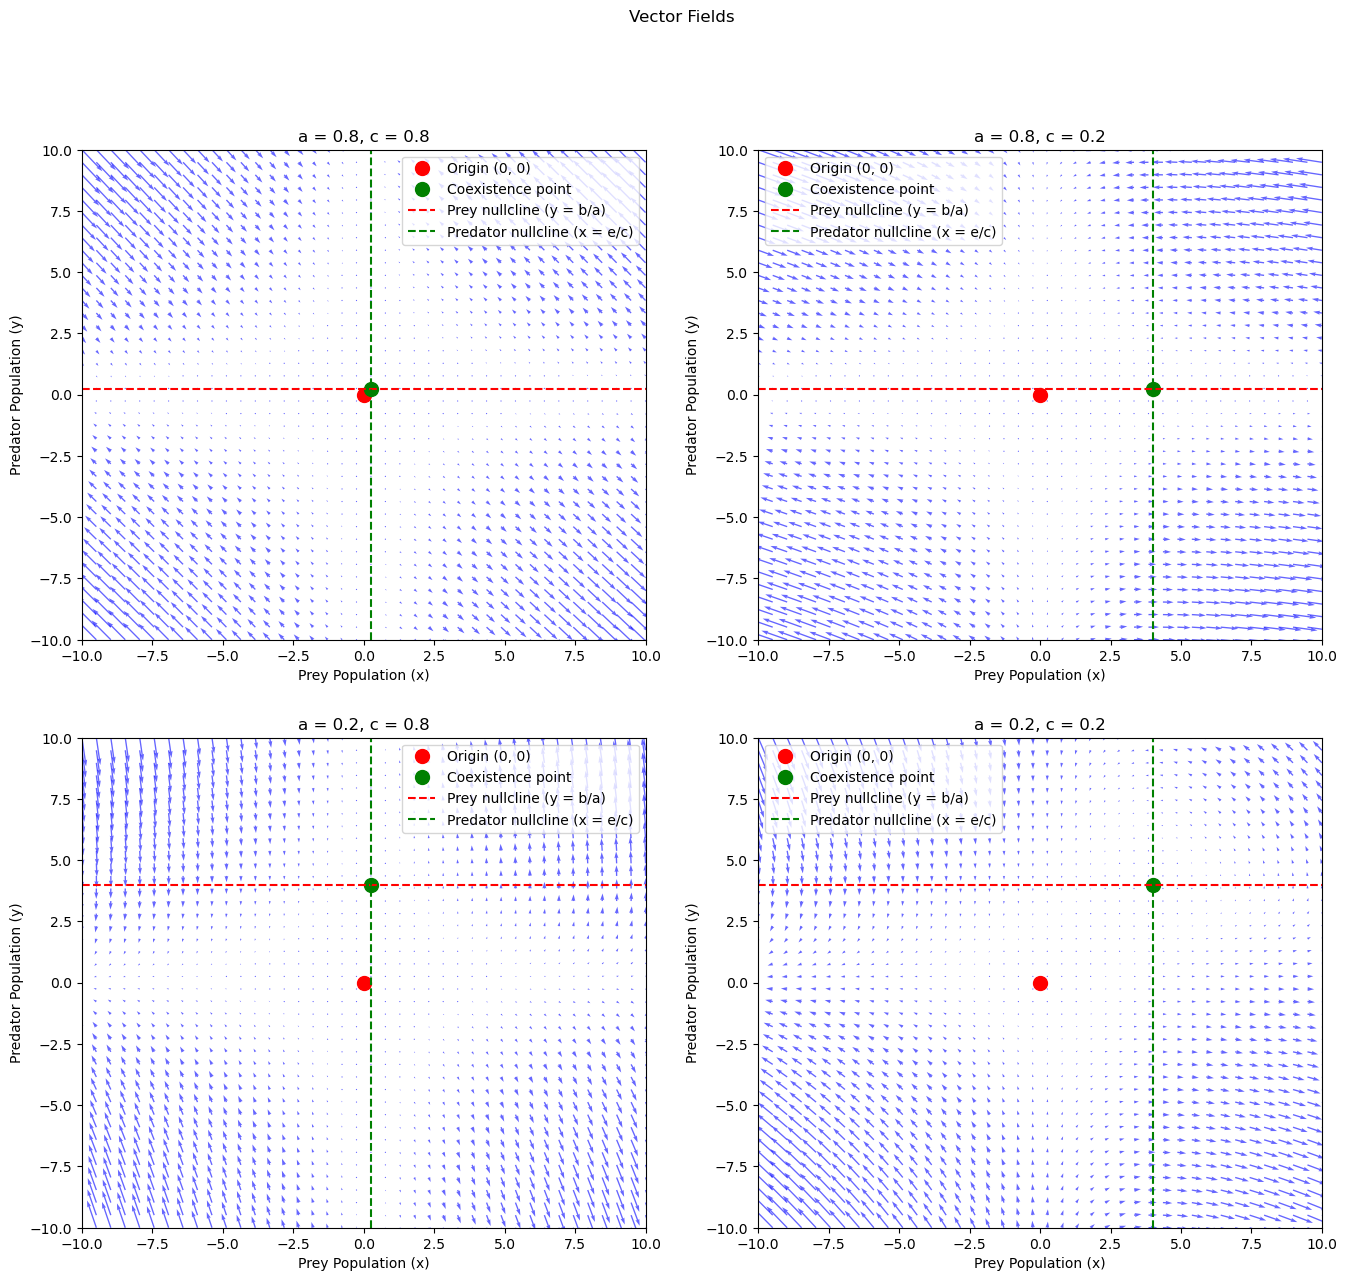

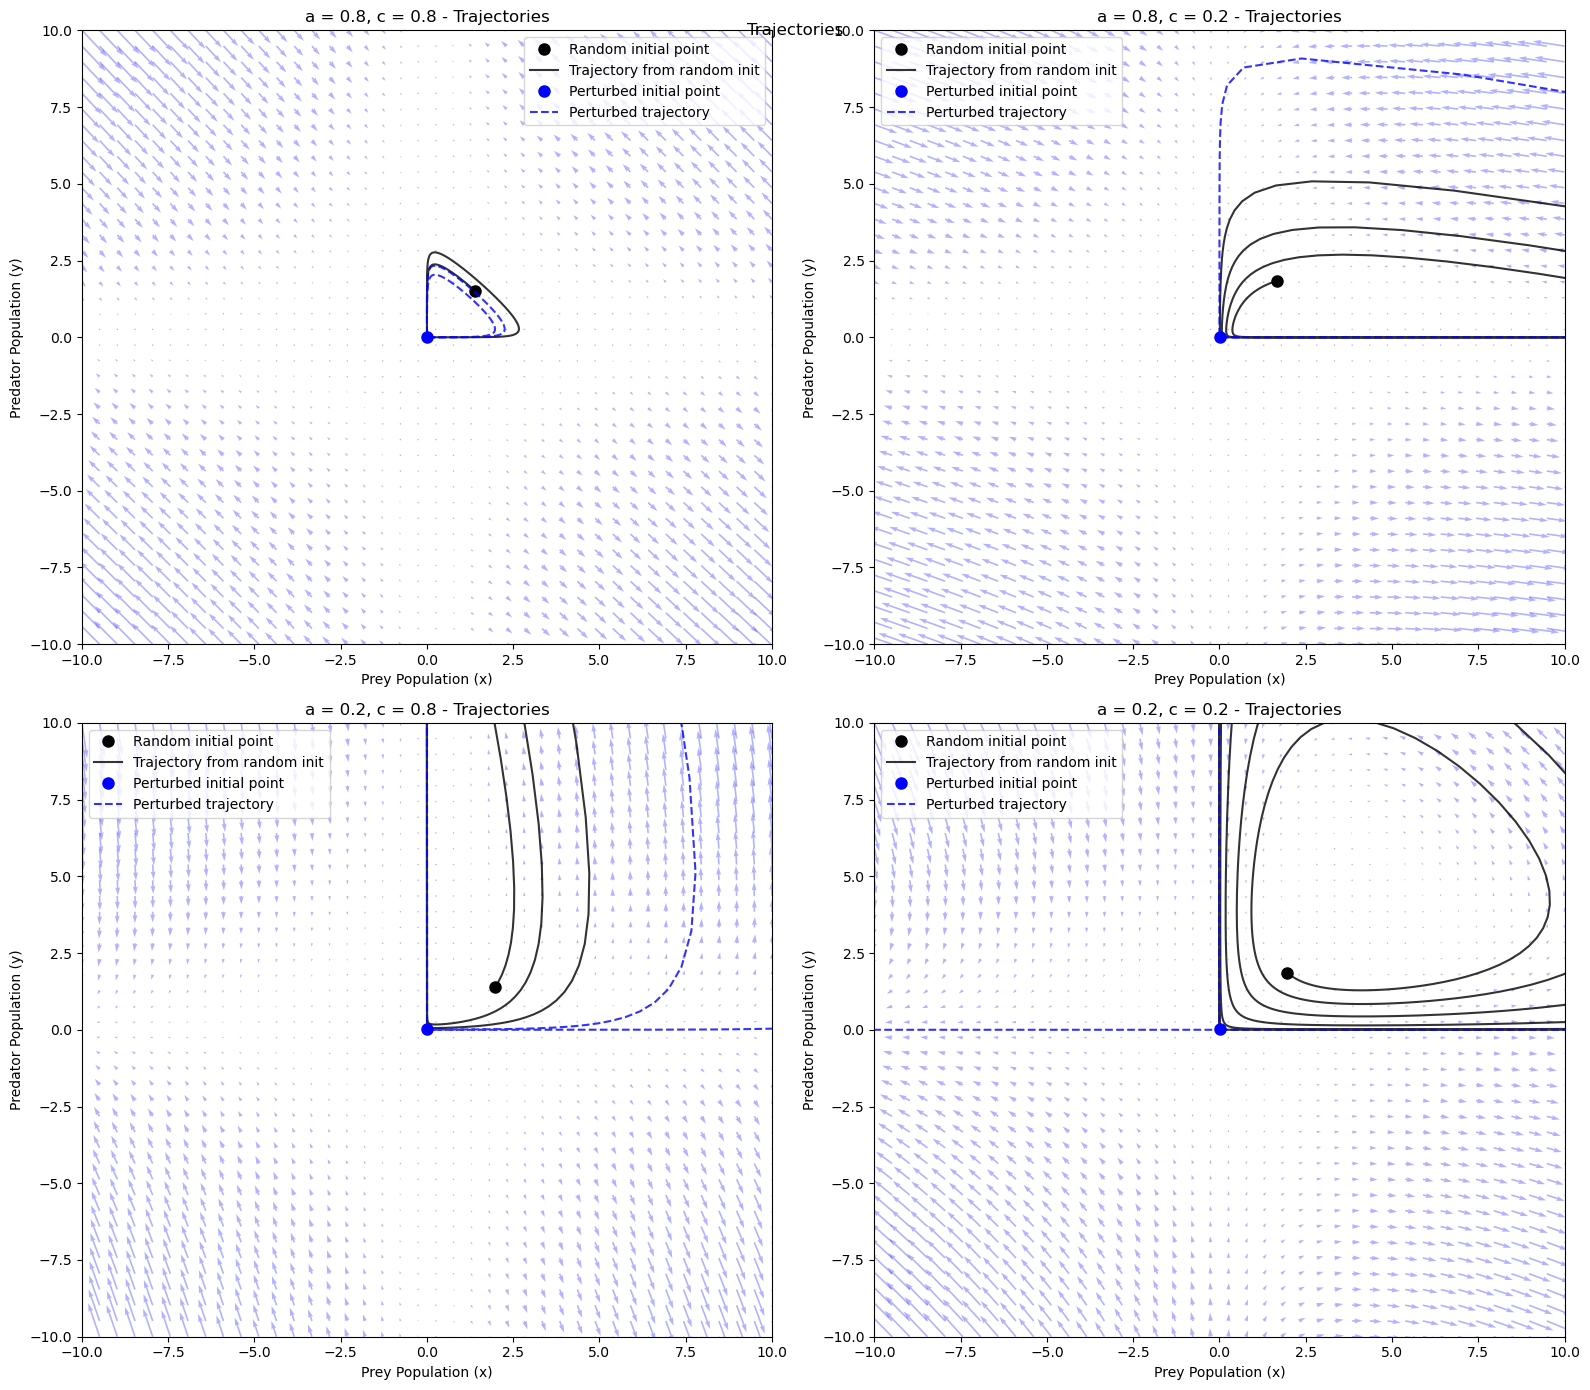

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def lotka_volterra(state, t, a, b, c, e):
    x, y = state
    dxdt = x * (b - a * y)
    dydt = y * (-e + c * x)
    return [dxdt, dydt]

a_values = [0.8, 0.2]
c_values = [0.8, 0.2]

x = np.linspace(-10, 10, 40)
y = np.linspace(-10, 10, 40)
X, Y = np.meshgrid(x, y)
t = np.linspace(0, 100, 1000)

fig, axes = plt.subplots(2, 2, figsize=(16, 14))
fig_traj, traj_axes = plt.subplots(2, 2, figsize=(16, 14))

for i, a in enumerate(a_values):
    for j, c in enumerate(c_values):
        b = 1 - a
        e = 1 - c
        
        U = X * (b - a * Y)
        V = Y * (-e + c * X)

        ax = axes[i, j]
        ax.quiver(X, Y, U, V, color='blue', alpha=0.6)

        fixed_points = [(0, 0), (e / c, b / a)]
        for point in fixed_points:
            ax.plot(point[0], point[1], 'ro', markersize=10, label='Origin (0, 0)' if point == (0, 0) else None) if point == (0, 0) else ax.plot(point[0], point[1], 'go', markersize=10, label='Coexistence point')  # Red for (0, 0), Green for coexistence

        ax.plot(x, [b / a] * len(x), 'r--', label='Prey nullcline (y = b/a)')
        ax.plot([e / c] * len(y), y, 'g--', label='Predator nullcline (x = e/c)')

        ax.set_title(f'a = {a}, c = {c}')
        ax.set_xlabel('Prey Population (x)')
        ax.set_ylabel('Predator Population (y)')
        ax.set_xlim([-10, 10])
        ax.set_ylim([-10, 10])
        ax.legend()

        traj_ax = traj_axes[i, j]
        traj_ax.quiver(X, Y, U, V, color='blue', alpha=0.3)
        initial_state = [np.random.uniform(1, 2), np.random.uniform(1, 2)]
        traj_ax.plot(initial_state[0], initial_state[1], 'ko', markersize=8, label='Random initial point')
        
        trajectory = [initial_state]
        dt = 0.1
        current_state = initial_state
        for _ in range(int(t[-1] / dt)):
            dxdt, dydt = lotka_volterra(current_state, 0, a, b, c, e)
            current_state = [current_state[0] + dxdt * dt, current_state[1] + dydt * dt]
            trajectory.append(current_state)
        trajectory = np.array(trajectory)
        traj_ax.plot(trajectory[:, 0], trajectory[:, 1], 'k-', label='Trajectory from random init', alpha=0.8)

        perturbed_state = [0.01, 0.01]
        traj_ax.plot(perturbed_state[0], perturbed_state[1], 'bo', markersize=8, label='Perturbed initial point')
        perturbed_trajectory = [perturbed_state]
        current_state = perturbed_state
        for _ in range(int(t[-1] / dt)):
            dxdt, dydt = lotka_volterra(current_state, 0, a, b, c, e)
            current_state = [current_state[0] + dxdt * dt, current_state[1] + dydt * dt]
            perturbed_trajectory.append(current_state)
        perturbed_trajectory = np.array(perturbed_trajectory)
        traj_ax.plot(perturbed_trajectory[:, 0], perturbed_trajectory[:, 1], 'b--', label='Perturbed trajectory', alpha=0.8)

        traj_ax.set_title(f'a = {a}, c = {c} - Trajectories')
        traj_ax.set_xlabel('Prey Population (x)')
        traj_ax.set_ylabel('Predator Population (y)')
        traj_ax.set_xlim([-10, 10])
        traj_ax.set_ylim([-10, 10])
        traj_ax.legend()

plt.tight_layout()
fig.suptitle('Vector Fields')
fig_traj.suptitle('Trajectories')
plt.show()


From the plots, the origin \((x, y) = (0, 0)\) is an unstable equilibrium. If both populations are exactly zero, they remain so. 

However, with a small perturbation, the system moves away from the origin, indicating that even a small introduction of prey or predators leads to dynamic changes in population sizes. 

This shows that the origin is not a stable state, and any slight presence of either species will initiate growth or decline based on the interaction rates.

If \(x = 0\) and \(y > 0\), predators will eventually die out due to lack of food.

If \(y = 0\) and \(x > 0\), prey will grow exponentially without predators to keep them in check.

To plot the mean population over one period, compute the average over one period from the solution obtained earlier. Plot the mean for both species to observe if it changes over time, indicating changes in population dynamics.

Let me know if you need help implementing any specific part of this or further explanations on the dynamics of the system.

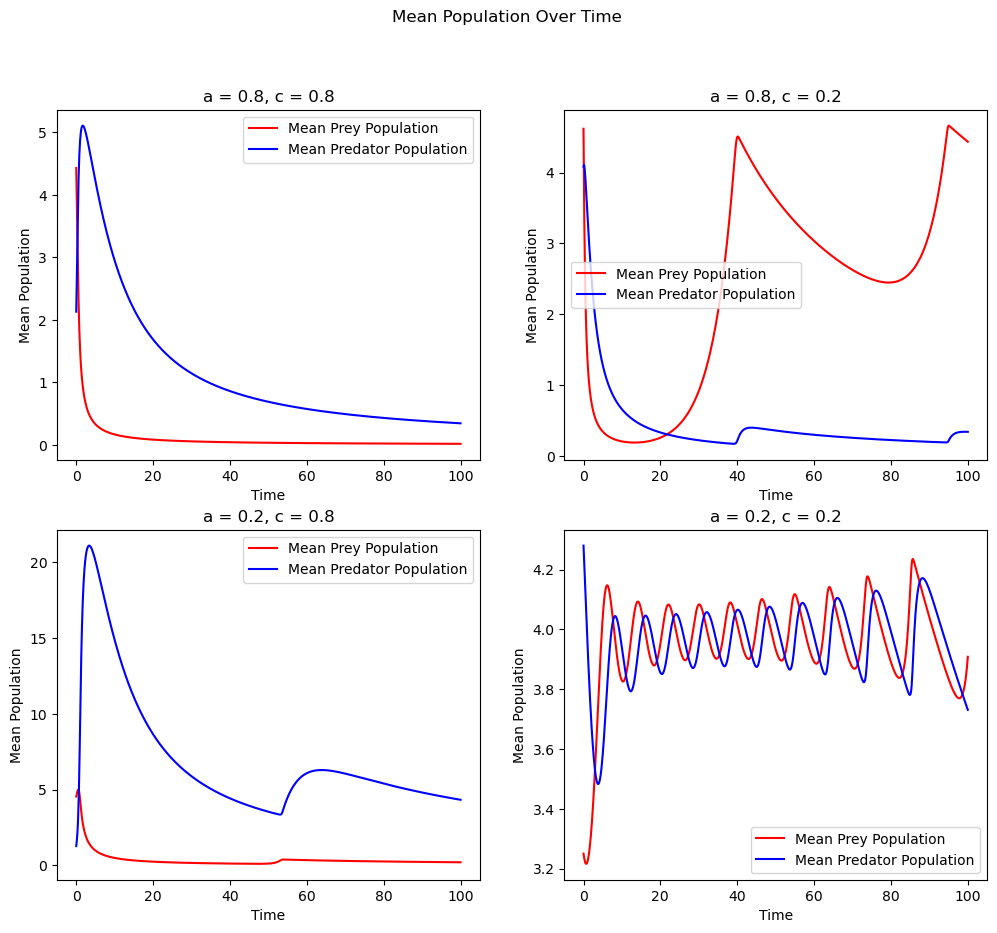

In [2]:
fig_mean, mean_axes = plt.subplots(2, 2, figsize=(12, 10))

for i, a in enumerate(a_values):
    for j, c in enumerate(c_values):
        b = 1 - a
        e = 1 - c
        
        initial_state = [np.random.uniform(1, 5), np.random.uniform(1, 5)]
        trajectory = [initial_state]
        dt = 0.1
        current_state = initial_state
        for _ in range(int(t[-1] / dt)):
            dxdt, dydt = lotka_volterra(current_state, 0, a, b, c, e)
            current_state = [current_state[0] + dxdt * dt, current_state[1] + dydt * dt]
            trajectory.append(current_state)
        trajectory = np.array(trajectory)
        prey_population = trajectory[:, 0]
        predator_population = trajectory[:, 1]
        mean_prey = [np.mean(prey_population[:i]) for i in range(1, len(prey_population))]
        mean_predator = [np.mean(predator_population[:i]) for i in range(1, len(predator_population))]
        
        ax_mean = mean_axes[i, j]
        ax_mean.plot(t, mean_prey, 'r-', label='Mean Prey Population')
        ax_mean.plot(t, mean_predator, 'b-', label='Mean Predator Population')
        ax_mean.set_title(f'a = {a}, c = {c}')
        ax_mean.set_xlabel('Time')
        ax_mean.set_ylabel('Mean Population')
        ax_mean.legend()

fig_mean.suptitle('Mean Population Over Time')
plt.show()